## Laboratorio 5 - Modelación y Simulación
### Ejercicio 1

Stefano Aragoni, Carol Arévalo, Luis Santos

----------------

#### Ejercicio 1 - Depredador - Presa
Debe crear una simulación de depredador-presa utilizando modelos basados en agentes. Modele varios tipos de
depredadores con diferentes comportamientos y agregue obstáculos que afecten los movimientos de los agentes.

Requisitos:
- Cree una clase Predator con diferentes subclases para diferentes tipos de depredadores.
- Modele diferentes comportamientos para distintos tipos de depredadores, como depredadores "cazadores" que persiguen activamente a sus presas y depredadores "emboscadores" que esconden y sorprenden a sus presas.
- Agregue obstáculos que los agentes deben rodear.
- Simule los movimientos de los agentes y visualice sus interacciones

----------------

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import uuid
from PIL import Image
from IPython.display import display, Image as IPImage

map = 100

In [56]:
class Obstacle():
    def __init__(self, x, y):
        self.position = np.array([x, y])

In [57]:
class Predator():
    def __init__(self, x, y):
        self.position = np.array([x, y])
        self.instance_hash = uuid.uuid4().hex

In [58]:
class Hunter(Predator):
    def __init__(self, x, y):
        super().__init__(x, y)
    
    def update(self, prey_list, obstacle_list):
        # Regla 1: 
        pass

In [59]:
class Ambusher(Predator):
    def __init__(self, x, y):
        super().__init__(x, y)
    
    def update(self, prey_list, obstacle_list):
        # Regla 1:
        pass

In [60]:
class Prey():
    def __init__(self, x, y):
        self.position = np.array([x, y])
        self.alive = True
        self.instance_hash = uuid.uuid4().hex
        self.speed = np.random.randint(1, 3)
    
    def update(self, predator_list, obstacle_list):

        # ------------------------------------------------------------
        # Regla 0: Que no se lo coma el depredador - Verificar si el depredador lo atrapó
        closest_predator = min(predator_list, key=lambda predator: np.linalg.norm(self.position - predator.position))
        if np.linalg.norm(self.position - closest_predator.position) < 3:
            self.alive = False
            return

        # ------------------------------------------------------------
        # Regla 1: Escapar - Huir del depredador más cercano
        closest_predator = min(predator_list, key=lambda predator: np.linalg.norm(self.position - predator.position))

        if np.linalg.norm(self.position - closest_predator.position) < 10:
            # Si el depredador está cerca, huir de él
            direction = self.position - closest_predator.position           # Calcular la dirección hacia el depredador más cercano 

        else:
            # Si el depredador está lejos, moverse o no moverse aleatoriamente
            if np.random.random() < 0.5:
                direction = np.random.random(2) * 2 - 1                      # Moverse aleatoriamente
            else:
                direction = np.array([0, 0])

        # ------------------------------------------------------------
        # Regla 2: Evitar obstáculos - Evitar el obstáculo más cercano
        closest_obstacle = min(obstacle_list, key=lambda obstacle: np.linalg.norm(self.position - obstacle.position))
        if np.linalg.norm(self.position - closest_obstacle.position) < 5:
            # Si el obstáculo está cerca, alejarse de él
            obstacle_direction = self.position - closest_obstacle.position
            obstacle_direction = obstacle_direction / np.linalg.norm(obstacle_direction)

        else:
            obstacle_direction = np.array([0, 0])

        # ------------------------------------------------------------
        # Regla 3: Alejarse de depredadores y obstáculos
        direction = (direction + obstacle_direction) / 2

        if np.linalg.norm(direction) > 0:       # Si la dirección normalizada no es cero, moverse en esa dirección
            direction_normalized = direction / np.linalg.norm(direction)
            new_position = self.position + direction_normalized * self.speed
        else:                                   # Si la dirección normalizada es cero, moverse aleatoriamente
            direction_random = np.random.random(2) * 2 - 1
            new_position = self.position + direction_random * self.speed

        # ------------------------------------------------------------
        # Regla 4: Que no se salga del mapa - Restringir la nueva posición dentro de los límites del mapa
        new_position = np.clip(new_position, 0, map - 1)

        self.position = new_position


In [61]:
obstacles = []
positions = ["-1,-1"]

for i in range(0, 11):

    x = np.random.randint(0, map-5)
    y = np.random.randint(0, map-5)

    for j in range(0, 6):
        for k in range(0, 6):
            obstacles.append(Obstacle(x, y))
            positions.append(str(x) + "," + str(y))

            x += 1

        x -= 6
        y += 1

In [62]:
predators = []
num_predators = 5

for i in range(0, num_predators):
    x = -1
    y = -1

    while str(x) + "," + str(y) in positions:
        x = np.random.randint(0, map-1)
        y = np.random.randint(0, map-1)

    if np.random.random() < 0.5:
        predators.append(Hunter(x, y))
        print("Hunter")
    else:
        predators.append(Ambusher(x, y))
        print("Ambusher")

Hunter
Ambusher
Ambusher
Ambusher
Ambusher


In [63]:
prey = []
num_prey = 100

for i in range(0, num_prey):
    x = -1
    y = -1

    while str(x) + "," + str(y) in positions:
        x = np.random.randint(0, map-1)
        y = np.random.randint(0, map-1)

    prey.append(Prey(x, y))

/var/folders/wq/gs7vpwkj7k31lw9njy09srjw0000gn/T/ipykernel_31814/3918203500.py:47: RuntimeWarning: invalid value encountered in true_divide
  new_position = self.position + (direction / np.linalg.norm(direction)) * self.speed
/var/folders/wq/gs7vpwkj7k31lw9njy09srjw0000gn/T/ipykernel_31814/3918203500.py:47: RuntimeWarning: invalid value encountered in true_divide
  new_position = self.position + (direction / np.linalg.norm(direction)) * self.speed
/var/folders/wq/gs7vpwkj7k31lw9njy09srjw0000gn/T/ipykernel_31814/3918203500.py:47: RuntimeWarning: invalid value encountered in true_divide
  new_position = self.position + (direction / np.linalg.norm(direction)) * self.speed
/var/folders/wq/gs7vpwkj7k31lw9njy09srjw0000gn/T/ipykernel_31814/3918203500.py:47: RuntimeWarning: invalid value encountered in true_divide
  new_position = self.position + (direction / np.linalg.norm(direction)) * self.speed


KeyboardInterrupt: 

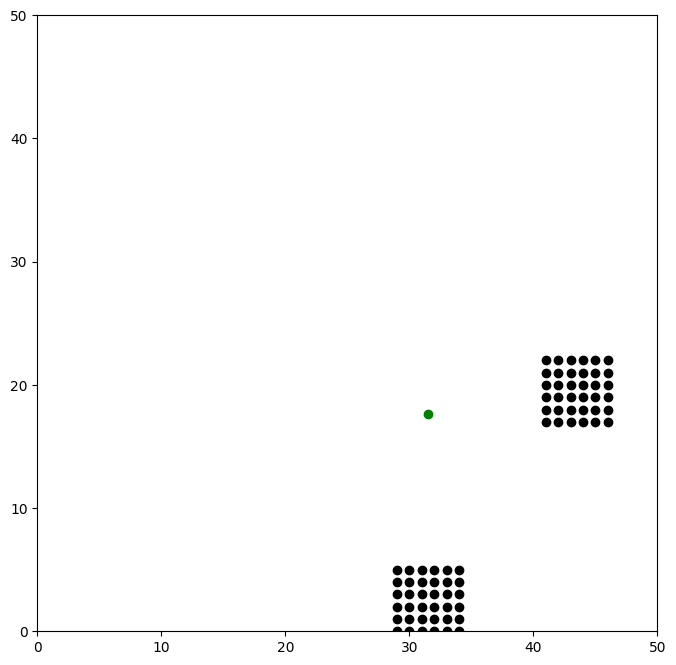

In [64]:
num_steps = 50
list_images = []

for step in range(num_steps):
    plt.figure(figsize=(8, 8))
    plt.xlim(0, 50)
    plt.ylim(0, 50)
    
    prey_positions = np.array([p.position for p in prey if p.alive])
    predator_positions = np.array([p.position for p in predators])

    for obstacle in obstacles:
        plt.plot(obstacle.position[0], obstacle.position[1], 'ko')
    
    if prey_positions.shape[0] > 0:
        for predator in predators:
            predator.update(prey, obstacles)
        
        for p in prey:
            if p.alive:
                p.update(predators, obstacles)
                plt.plot(p.position[0], p.position[1], 'go')
        
        for predator in predators:
            plt.plot(predator.position[0], predator.position[1], 'ro')
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Step " + str(step))
    name = "step_" + str(step) + ".jpg"
    plt.savefig(name, format="jpg")
    plt.close()
    list_images.append(name)

# Crear el GIF
images = [Image.open(path) for path in list_images]
images[0].save('predator_prey_simulation.gif', save_all=True, append_images=images[1:], loop=0, duration=200)

# Mostrar el GIF
display(IPImage("predator_prey_simulation.gif"))